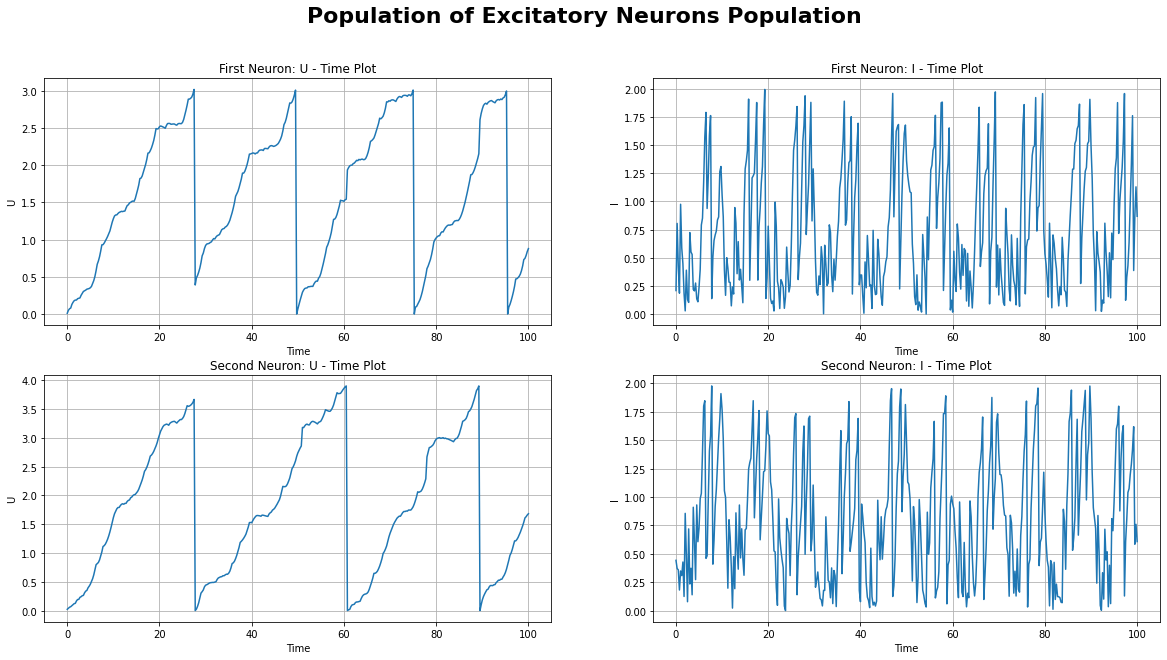

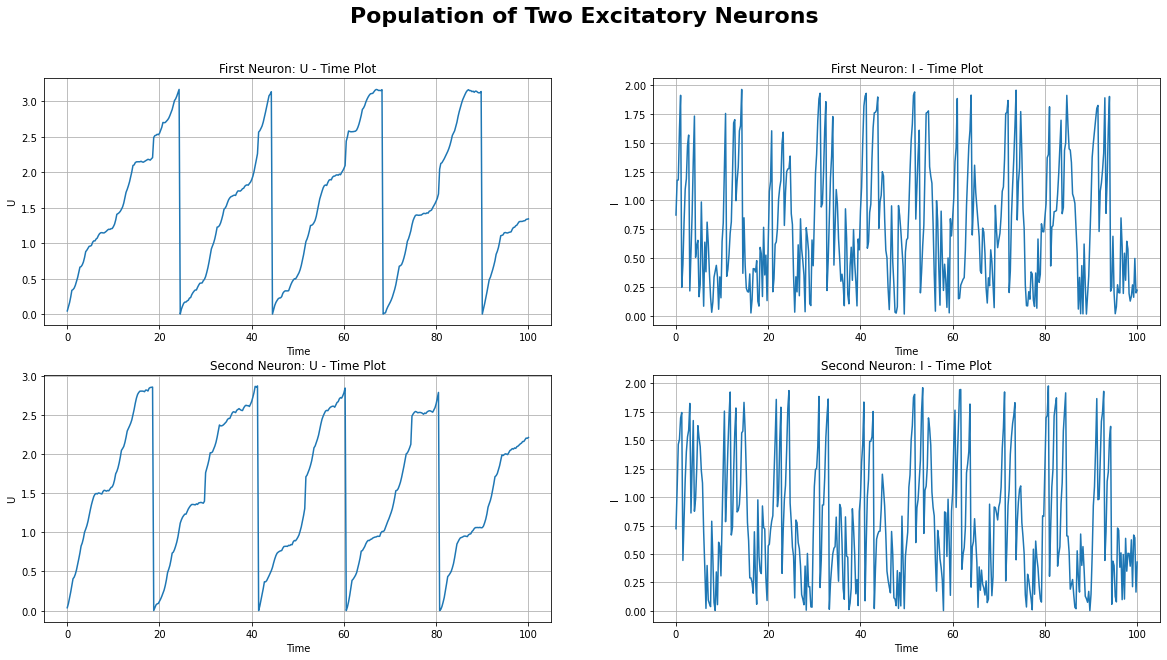

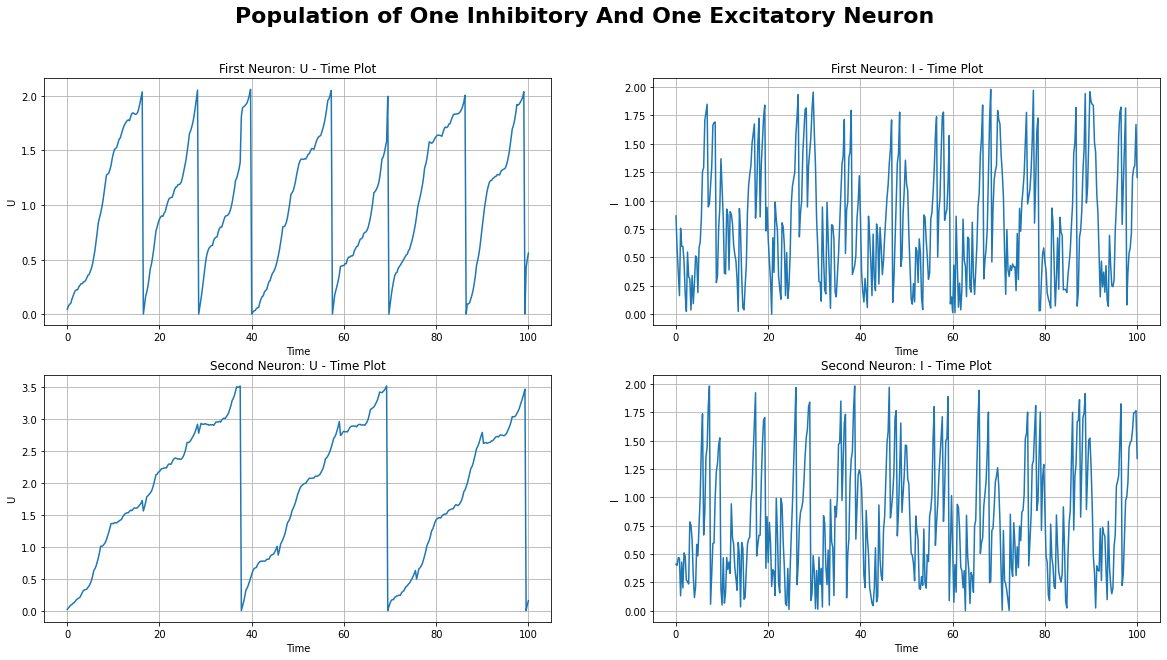

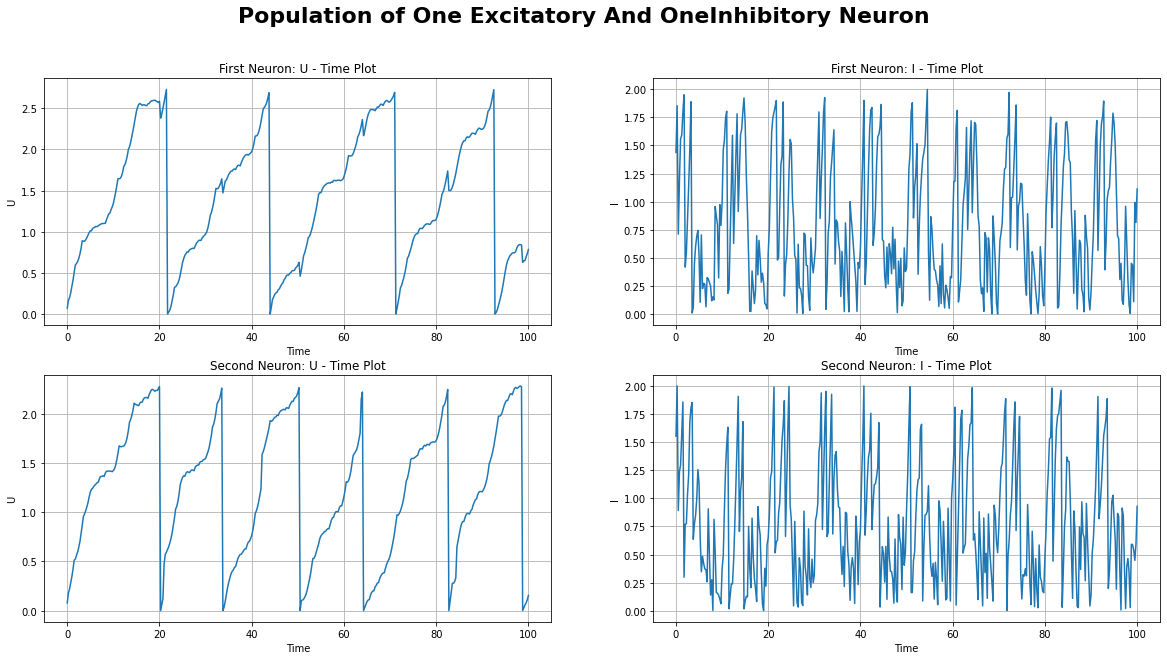

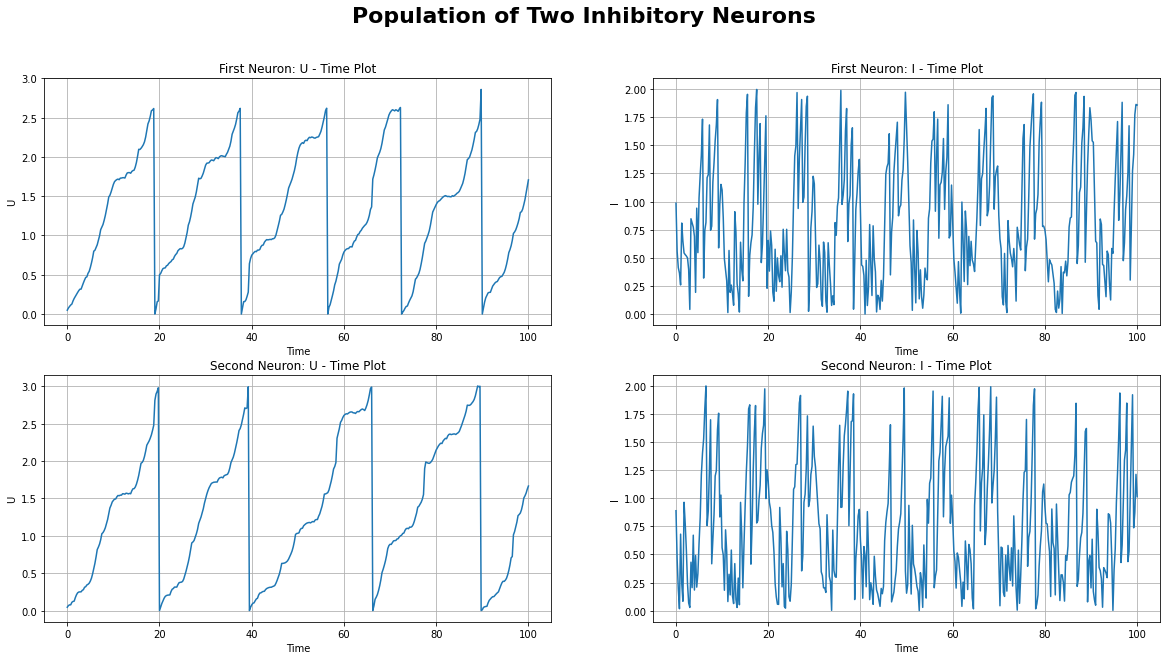

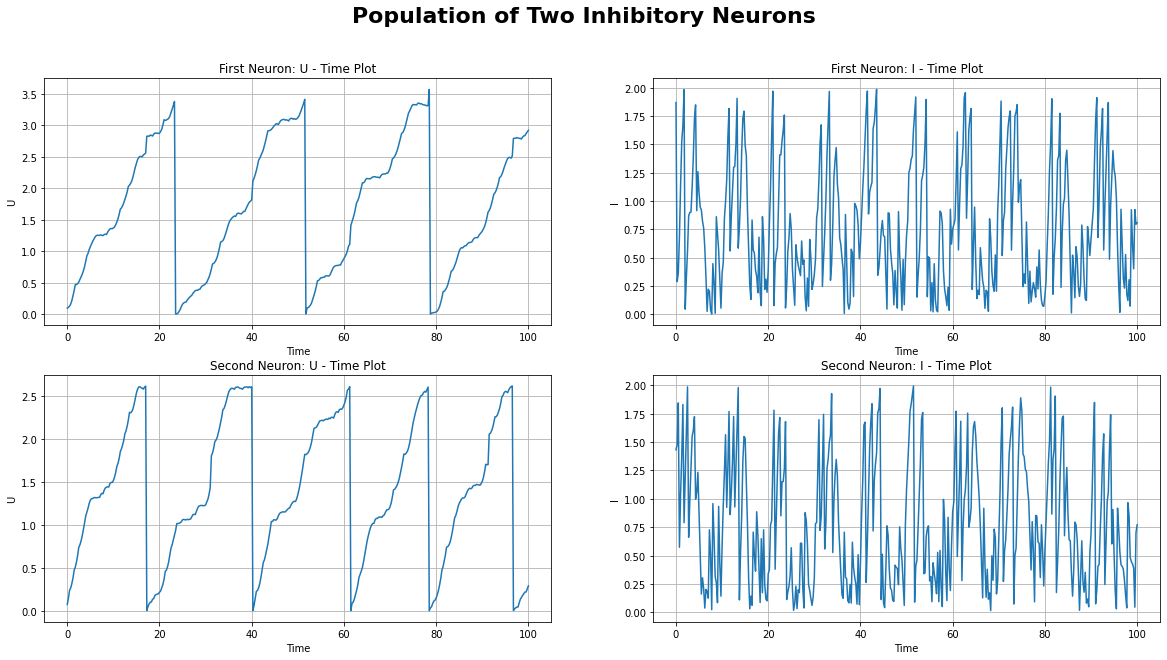

In [7]:
#Hasan Roknabady
import numpy as np
import random
import matplotlib.patches as mpatches
from matplotlib.pyplot import *


class Rand_current:
    def __init__(self, i=1, step=100):
        self.last_i = 0
        self.up_high = True
        self.i = i
        self.step = step

    def get(self, it):
        if it % 20 == 0:
            self.up_high = not self.up_high
        tmp = random.random()
        if self.up_high:
            tmp = self.last_i + tmp * (self.i / 2)
        else:
            tmp = self.last_i - tmp * (self.i / 2)
        if tmp > self.i * 2 or tmp < 0:
            tmp = random.random() * self.i
        self.last_i = tmp
        return tmp

# we have neuron class with LIF model that we have in past
class Neuron:

    #p --> population
    #neuron type --> t
    def __init__(self,t="excitatory", p=0, idx=0):
        self.t = t
        self.p = p
        self.idx = idx
        self.time = 100
        self.dt = 0.25
        self.u_rest = 0
        self.R = 10
        self.C = 5
        #thre --> threshold
        self.thre = 2 + random.random() * 2
        self.step = np.arange(0, self.dt + self.time, self.dt)
        self.tha = self.R * self.C
        self.current_input = 0
        self.U = len(self.step) * [self.u_rest]

    def plot_details(ylabell, xlabell, titlee):
        ylabel(ylabell)
        xlabel(xlabell)
        title(titlee)
        grid(True)

    def plotting_exi_inh(t, idx):
        n1 = Neuron(t, idx)
        return n1

    def update_potential(self, val, j, pre_t):
        if pre_t == "excitatory" or pre_t == "inhibitory" and self.t == "inhibitory":
            self.U[j] += val
        else:
            self.U[j] -= val

    def readjust(self, t):
        for i in range(t, len(self.step)):
            self.U[i] = self.u_rest


    def bring_up_to_date(self, j, charge):
        self.U[j] += self.U[j - 1] \
                     + (self.R * charge - (self.U[j - 1] - self.u_rest)) \
                     / self.tha * self.dt
        result = 0
        if self.U[j] >= self.thre:
            result = self.thre - self.u_rest
            self.U[j] = self.u_rest
        return result



def join(first_neuron, second_neuron,
         rand1=Rand_current(), rand2=Rand_current(),
         w=0.1, title_of_plt=None):

    first_neuron_input = [0] * len(first_neuron.step)
    second_neuron_input = [0] * len(second_neuron.step)

    # neuron --> 1
    for i in range(len(first_neuron.step)):
        current_i = rand1.get(i)
        first_neuron_input[i] = current_i
        quotient = first_neuron.bring_up_to_date(j=i, charge=current_i)
        if quotient > 0:
            second_neuron.update_potential(w * quotient, j=i, pre_t=first_neuron.t)

    # neuron --> 2
    for i in range(len(first_neuron.step)):
        current_i = rand2.get(i)
        second_neuron_input[i] = current_i
        quotient = second_neuron.bring_up_to_date(j=i, charge=current_i)
        if quotient > 0:
            first_neuron.update_potential(w * quotient, j=i, pre_t=second_neuron.t)
            first_neuron.readjust(i + 1)
            for update_time in range(i + 1, len(first_neuron.step)):
                first_neuron.bring_up_to_date(j=update_time, charge=first_neuron_input[update_time])

    # plotting
    fig = figure(num=None, figsize=(20, 10))
    fig.suptitle(title_of_plt, fontsize=22, fontweight='bold')

    

    subplot(221)
    plot(first_neuron.step, first_neuron.U)
    Neuron.plot_details("U", "Time", "First Neuron: U - Time Plot")


    subplot(223)
    plot(second_neuron.step, second_neuron.U)
    Neuron.plot_details("U", "Time", "Second Neuron: U - Time Plot")


    subplot(222)
    plot(first_neuron.step, first_neuron_input)
    Neuron.plot_details("I", "Time", "First Neuron: I - Time Plot")


    subplot(224)
    plot(second_neuron.step, second_neuron_input)
    Neuron.plot_details("I", "Time", "Second Neuron: I - Time Plot")






n1 = Neuron.plotting_exi_inh(t="excitatory", idx=0)
n2 = Neuron.plotting_exi_inh(t="excitatory", idx=1)
join(n1, n2, title_of_plt="Population of Excitatory Neurons Population")

###
n1 = Neuron.plotting_exi_inh(t="excitatory", idx=0)
n2 = Neuron.plotting_exi_inh(t="excitatory", idx=1)
join(n1, n2, title_of_plt="Population of Two Excitatory Neurons")
###



n1 = Neuron.plotting_exi_inh(t="inhibitory", idx=0)
n2 = Neuron.plotting_exi_inh(t="excitatory", idx=1)
join(n1, n2, title_of_plt="Population of One Inhibitory And One Excitatory Neuron")
###

n1 = Neuron.plotting_exi_inh(t="excitatory", idx=0)
n2 = Neuron.plotting_exi_inh(t="inhibitory", idx=1)
join(n1, n2, title_of_plt="Population of One Excitatory And OneInhibitory Neuron")
###


###
n1 = Neuron.plotting_exi_inh(t="inhibitory", idx=0)
n2 = Neuron.plotting_exi_inh(t="inhibitory", idx=1)
join(n1, n2, title_of_plt="Population of Two Inhibitory Neurons")


###
n1 = Neuron.plotting_exi_inh(t="inhibitory", idx=0)
n2 = Neuron.plotting_exi_inh(t="inhibitory", idx=1)
join(n1, n2, title_of_plt="Population of Two Inhibitory Neurons")